<a href="https://colab.research.google.com/github/ChinnamLakshmiDurga/Image-Recognition-with-Tensorflow/blob/main/Handwritten_Numbers_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import your libraries
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt 
import random

In [ ]:
# Check that your version of Tensorflow is 2.x
tf.version.VERSION

'2.6.0'

In [ ]:
# Load in the MNIST handwritten numbers dataset (28, 28, 1)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Load in CIFAR10 colored image dataset (32, 32, 3)
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Divide by the max value of grayscale picture
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

<Figure size 432x288 with 0 Axes>

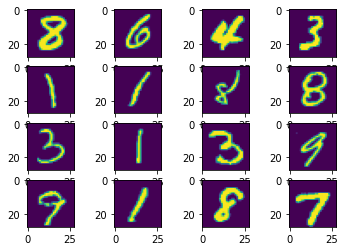

In [ ]:
# Let's show some of the pictures
NUM_ROWS = 4
NUM_COLS = 4
plt.figure()
f, axarr = plt.subplots(NUM_ROWS, NUM_COLS) 

for i in range(NUM_ROWS):
  for j in range(NUM_COLS):
    axarr[i][j].imshow(x_train[random.randint(0, 50000)])

In [ ]:
# Time to make our Neural Network model
modelNN = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
modelNN.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Initializing the model for training
modelNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training the model!
modelNN.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1476 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9762


In [ ]:
# Test if your model works on data it has never seen
modelNN.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0758 - accuracy: 0.9768


[0.07577537000179291, 0.9768000245094299]

***

In [ ]:
# Change the X data a bit
#x_train, x_test = x_train.reshape(-1, 32, 32, 1), x_test.reshape(-1, 32, 32, 1)
#x_train, x_test = x_train.reshape(-1, 32, 32, 3), x_test.reshape(-1, 32, 32, 3)

In [ ]:
# Time to make our CNN model
modelCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
modelCNN.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                147488    
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

In [ ]:
# Initializing the model for training
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training the model!
modelNN.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0316 - accuracy: 0.9893


In [ ]:
# Test if your model works on data it has never seen
modelNN.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0710 - accuracy: 0.9803


[0.0709872916340828, 0.9803000092506409]